# Imports

In [278]:
import pandas as pd
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Functions

In [273]:
def multiple_scatter(a, b, c, d):
    features = a
    x = b
    subplot_num_row = c
    subplot_num_col = d
    
    fig = plt.figure(figsize=(15,15))
    
    i = 1
    for f in features:
        
        plt.subplot(subplot_num_row,
                    subplot_num_col,
                    i)
        
        sns.scatterplot(x = df[x],
                        y = df[f],
                        hue = df['HeartDisease'])
        
        plt.title(x + ' vs ' + f)
        plt.xticks(rotation=45)
        
        i += 1
        
        #https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [294]:
def multiple_boxplots(a,b,c,d):
    
    features = a
    x = b
    subplot_num_row = c
    subplot_num_col = d
    
    fig = plt.figure(figsize=(10,15))
    
    i = 1
    for f in features:
        
        plt.subplot(subplot_num_row,
                    subplot_num_col,
                    i
        )
        
        sns.boxplot(x = df[x],
                    y = df[f]
        )
        
        #plt.xticks(rotation=90)
        
        i += 1
        
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
        

In [276]:
def remove_outliers_z(data,variable):
    
    #https://www.kite.com/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python
    data['z_scores'] = np.abs(stats.zscore(data[variable]))
    data = data.loc[data['z_scores'] < 3,:]
    data = data.drop('z_scores',axis = 1)
    
    return data

# Heart.csv

In [137]:
url = 'https://raw.githubusercontent.com/EmeryK-1/DataMadness/main/heart.csv'

In [138]:
df = pd.read_csv(url)

In [139]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# EDA

In [148]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## Missing Values/Odd Values

*RestingBP*

In [162]:
#df['RestingBP'].unique()

In [143]:
df['RestingBP'] = df['RestingBP'].apply(lambda x: x if x!=0 else round(df['RestingBP'].mean(), 1))

**There was 1 instance where 'RestingBP' = 0. I replaced 0 with column mean.**

*Cholesterol*

In [166]:
#df['Cholesterol'].unique()

In [209]:
df['Cholesterol'] = df['Cholesterol'].apply(lambda x: x if x!=0 else round(df['Cholesterol'].mean(), 1))

**There was 1 instance where 'Cholesterol' = 0. I replaced 0 with column mean.**

## Quantitative Variables

In [170]:
df_num = df[['Age','RestingBP','Cholesterol','MaxHR', 'Oldpeak']]

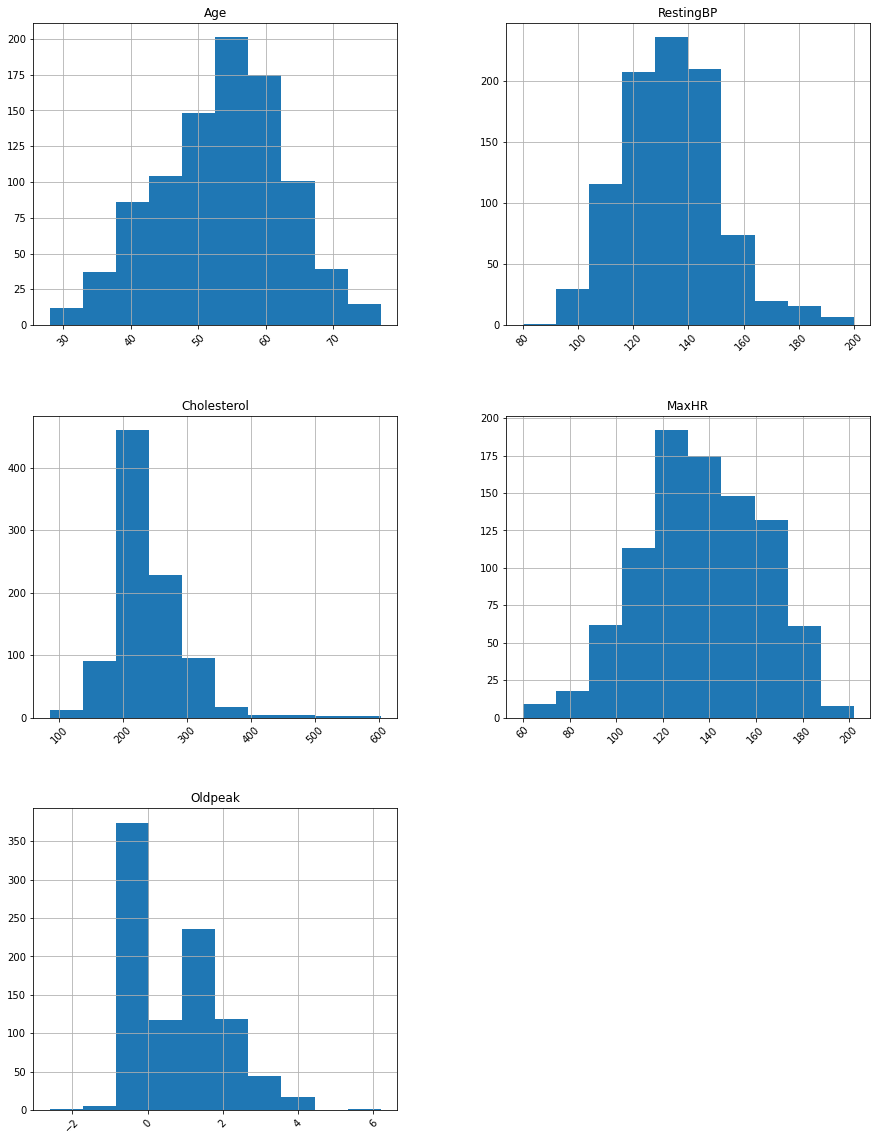

In [173]:
df_num.hist(figsize=(15,20), xrot=45)
plt.show()

In [169]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540741,236.047495,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989932,56.240898,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,198.800000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


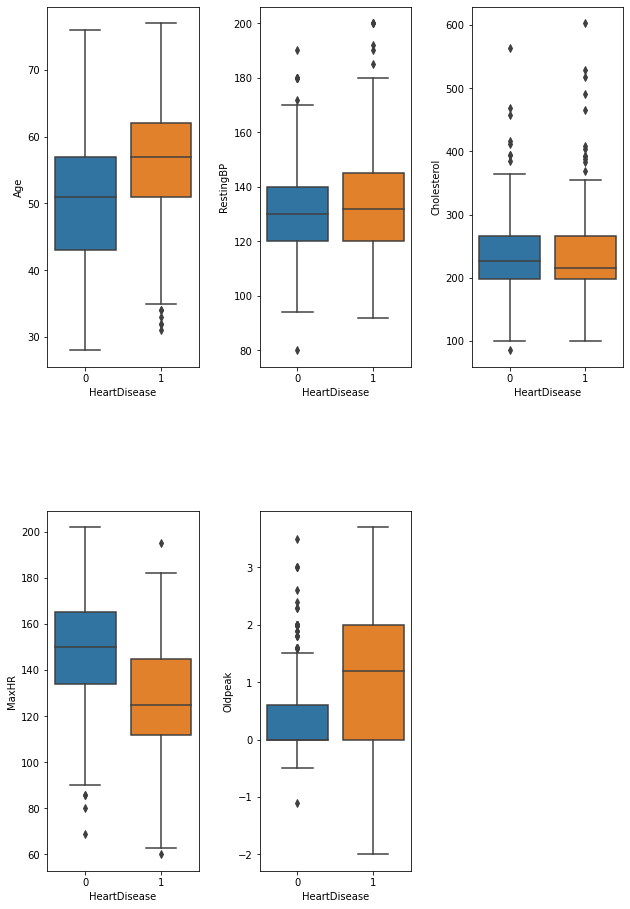

In [295]:
f = df[['Age','RestingBP','Cholesterol','MaxHR', 'Oldpeak']]
multiple_boxplots(f,'HeartDisease',2,3)

Difference in population means?: Age, MaxHR

Outliers?: Oldpeak, Cholesterol, RestingBP

Are outliers important in this case? Train model with and without outliers?

In [301]:
with_outliers = ['Oldpeak', 'Cholesterol', 'RestingBP']

df_no_outliers = df
df_no_outliers = remove_outliers_z(df_no_outliers, 'Oldpeak')
df_no_outliers = remove_outliers_z(df_no_outliers, 'Cholesterol')
df_no_outliers = remove_outliers_z(df_no_outliers, 'RestingBP')

<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

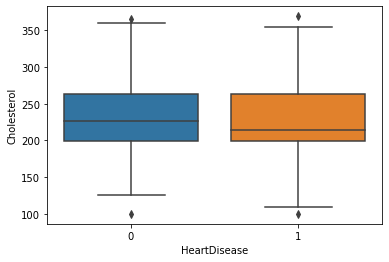

In [302]:
sns.boxplot(x=df_no_outliers['HeartDisease'], y = df_no_outliers['Cholesterol'])

In [305]:
#sns.boxplot(x=df_no_outliers['HeartDisease'], y = df_no_outliers['Oldpeak'])

<AxesSubplot:xlabel='HeartDisease', ylabel='RestingBP'>

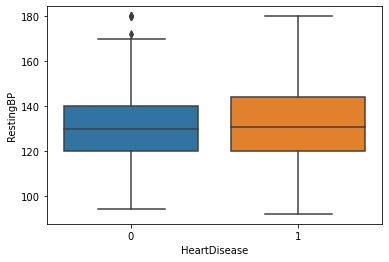

In [304]:
sns.boxplot(x=df_no_outliers['HeartDisease'], y = df_no_outliers['RestingBP'])

### Age

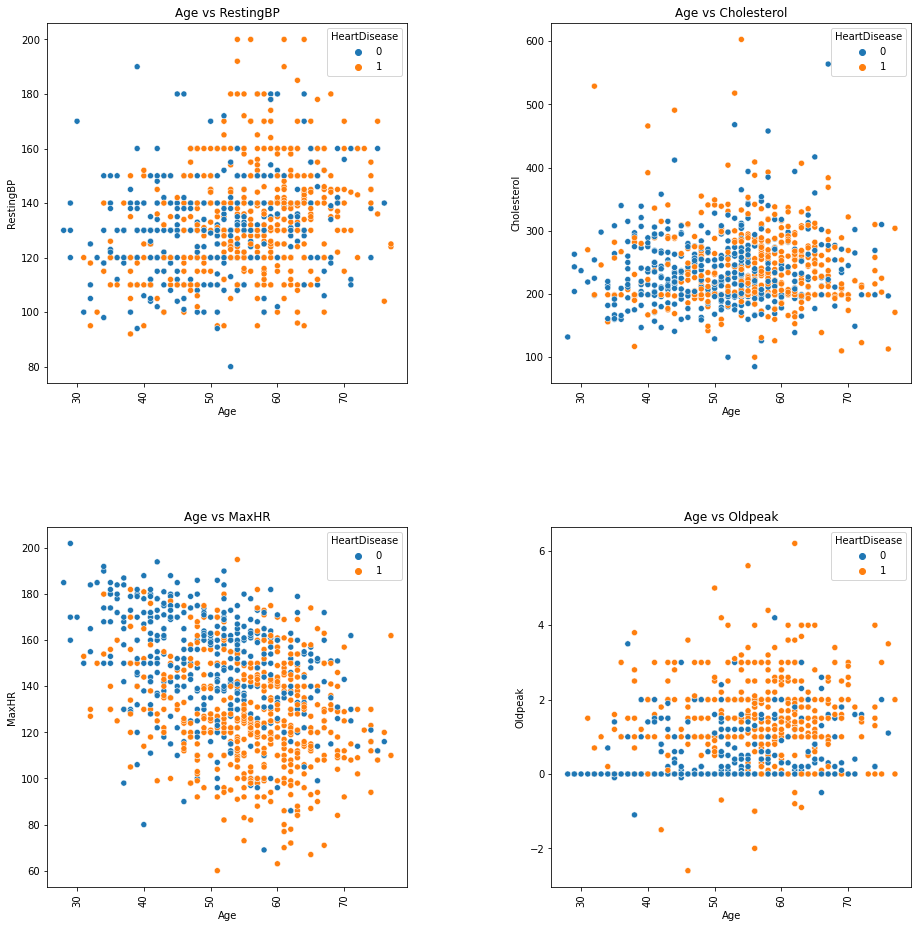

In [220]:
f = df[['RestingBP','Cholesterol','MaxHR', 'Oldpeak']]
multiple_scatter(f, 'Age',2,2)

## Categorical Variables

In [257]:

df_cat = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'FastingBS', 'ST_Slope']

for _ in df_cat:
    print(df[_].value_counts())
    print("")

M    725
F    193
Name: Sex, dtype: int64

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

N    547
Y    371
Name: ExerciseAngina, dtype: int64

0    704
1    214
Name: FastingBS, dtype: int64

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64



- Sex: extremely imbalanced (less F)
- FastingBS: extremly imbalanced (less 1)


- ChestPainType: imbalanced, TA extremely under represented
- ST_Slope: imbalanced, Down extremely under represented
- RestingECG: somewhat imbalnaced, # Normal ~ # LVH + ST


- ExerciseAngina: balanced

# Prepare Dataset